
#### Short Analysis on Sales


In [2]:
import pandas as pd
import numpy as np
import os
import calendar

#### Reading the Dataset

#### Many Comment Statements have been included which are done for additional information
#### Comments which has double # symbol are logically and technically new

In [3]:
df = pd.read_csv('./every_months_concatenated_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09-01-2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
#df = pd.read_csv('./../Sales_March_2019.csv')
files = [file for file in os.listdir('./Sales_Data')]
all_month_files = pd.DataFrame()
for file in files :
    print(file)
    file_name = pd.read_csv('./Sales_Data/'+file)
    all_month_files = pd.concat([all_month_files, file_name])
all_month_files.to_csv('every_month_concatenated_data.csv', index=False)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
df = pd.read_csv('./every_months_concatenated_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09-01-2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Question 1 : What was  the best month and worst month for sales and how much was earned in those months?

In [6]:
# Cleaning up the data (Dropping Null Values)
df =df.dropna(how='all')
# Removing String values other than date strings from Order Date column. i.e : Order date column has some values = 'Order date'
# we are removing that one 
df = df[df['Order Date']!='Order Date']
# Now Creating a seperate column Month and converting it into integer data type 
df['Month'] = (df['Order Date'].str[0:2]).astype(int)
df.sort_values(['Month'], inplace = True)
## Including the name of the month
df ['Month Name'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
## df['Month'] = pd.to_numeric(df['month'])
# Multiplying Quantity Ordered and Price Each
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each']  = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Price Each']*df['Quantity Ordered']
#Grouping According to the month and summing up the sales values
results = df.groupby(['Month', 'Month Name']).sum(['Sales'])
results

,,Quantity Ordered,Price Each,Sales
Month,Month Name,,,
1,Jan,10903,1.811768e+06,1.822257e+06
2,Feb,13449,2.188885e+06,2.202022e+06
3,Mar,17005,2.791208e+06,2.807100e+06
4,Apr,20558,3.367671e+06,3.390670e+06
5,May,18667,3.135125e+06,3.152607e+06
6,Jun,15253,2.562026e+06,2.577802e+06
7,Jul,16072,2.632540e+06,2.647776e+06
8,Aug,13448,2.230345e+06,2.244468e+06
9,Sep,13109,2.084992e+06,2.097560e+06



#### Visuavalizing the Result

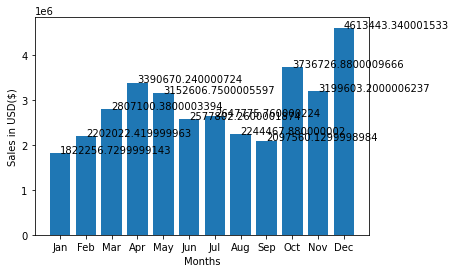

In [7]:
import matplotlib.pyplot as plt
## Function to include value labels in the bar chart 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
months_list = list(df['Month Name'].unique())
sales_list = list(results['Sales'])
month = range(1,13)
plt.bar(months_list, results['Sales'])
plt.rcParams["figure.figsize"] = (40,10)
addlabels(months_list, sales_list)
plt.xlabel('Months')
plt.ylabel('Sales in USD($)')
plt.show()

#### Question 2 Which City has most number of Sales? Note that  two different states may have the same city name.

In [8]:
#Filtering the City names according to State from Purchase Address Column
def get_city(name):
    return name.split(',')[1]
def get_state(name):
    state_code=name.split(',')[2]
    return state_code[0:3]
df['City Name State Code']=df['Purchase Address'].apply(lambda x : get_city(x)+ ' '+ get_state(x))
results_orders = df.groupby(['City Name State Code']).sum(['Sales'])
results_orders

,Quantity Ordered,Price Each,Month,Sales
City Name State Code,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


#### Visualizing number Orders according to each cities

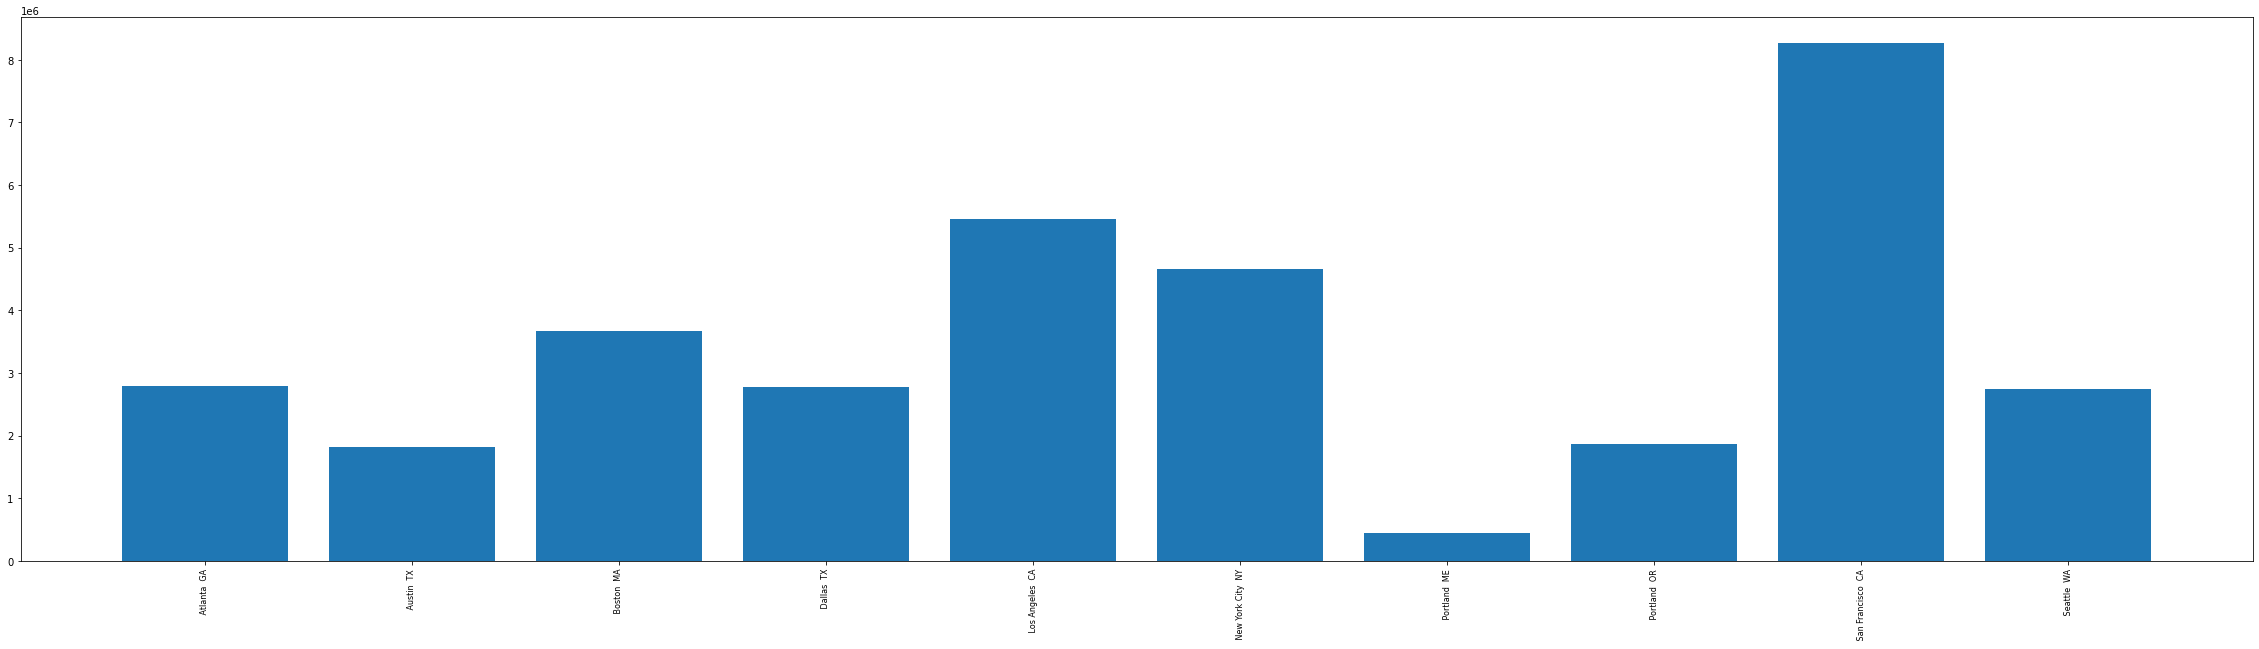

In [9]:
import matplotlib.pyplot as plt
## Function to include value labels in the bar chart 
cities = [city for city, df in df.groupby('City Name State Code')]
plt.bar(cities, results_orders['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.rcParams["figure.figsize"] = (20,8)

plt.show()

#### Question 3  What Time should we display ads to maximize likelihood of customer's buying the Product?

In [10]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df ['Hours']=df['Order Date'].dt.hour
results = df.groupby(['Hours']).count()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month Name,Sales,City Name State Code
Hours,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


#### Visualizing 

Text(0, 0.5, 'Number Of Orders')

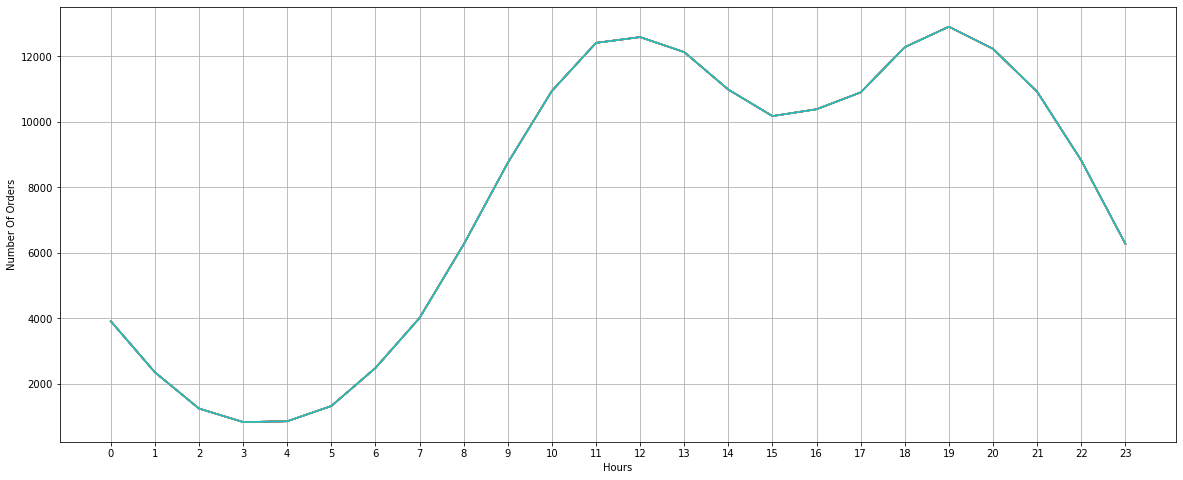

In [11]:
hours = [hour for hour, df in df.groupby('Hours')]
plt.plot(hours, df.groupby('Hours').count())
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number Of Orders')

#### Question 4 : What Product s are most often sold together?

In [12]:
df2 = df[df['Order ID'].duplicated(keep=False)]
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df2[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-12-430666400e73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [13]:
df2

,Order ID,Grouped
70743,144271,"Lightning Charging Cable,iPhone"
70812,144339,"iPhone,Wired Headphones"
70819,144344,"USB-C Charging Cable,Google Phone"
70869,144394,"Google Phone,Wired Headphones"
71072,144584,"USB-C Charging Cable,Google Phone"
...,...,...
47132,311665,"Google Phone,USB-C Charging Cable"
47115,311650,"Wired Headphones,Google Phone"
47173,311704,"Vareebadd Phone,USB-C Charging Cable"
47186,311715,"Flatscreen TV,AAA Batteries (4-pack)"


In [14]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('Lightning Charging Cable', 'iPhone') 525
('USB-C Charging Cable', 'Google Phone') 522
('iPhone', 'Lightning Charging Cable') 490
('Google Phone', 'USB-C Charging Cable') 477
('Wired Headphones', 'iPhone') 253
('Wired Headphones', 'Google Phone') 233
('iPhone', 'Wired Headphones') 209
('USB-C Charging Cable', 'Vareebadd Phone') 198
('iPhone', 'Apple Airpods Headphones') 191
('Google Phone', 'Wired Headphones') 190


#### Question 5 What product sold the most? Why do you think it sold the most?

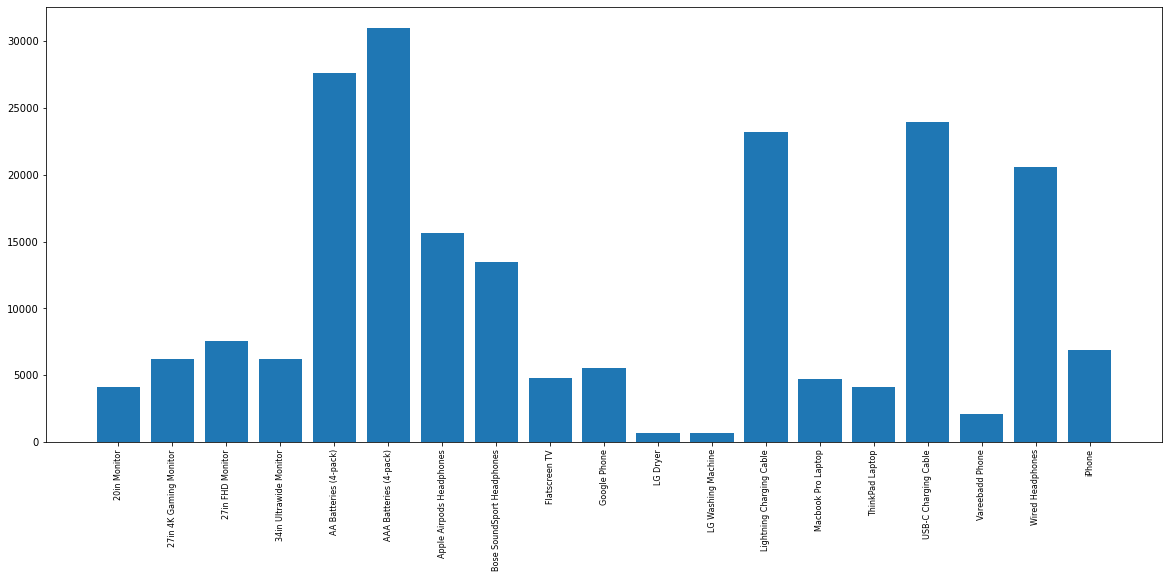

In [15]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-18-e3d30b18b3b6>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-18-e3d30b18b3b6>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


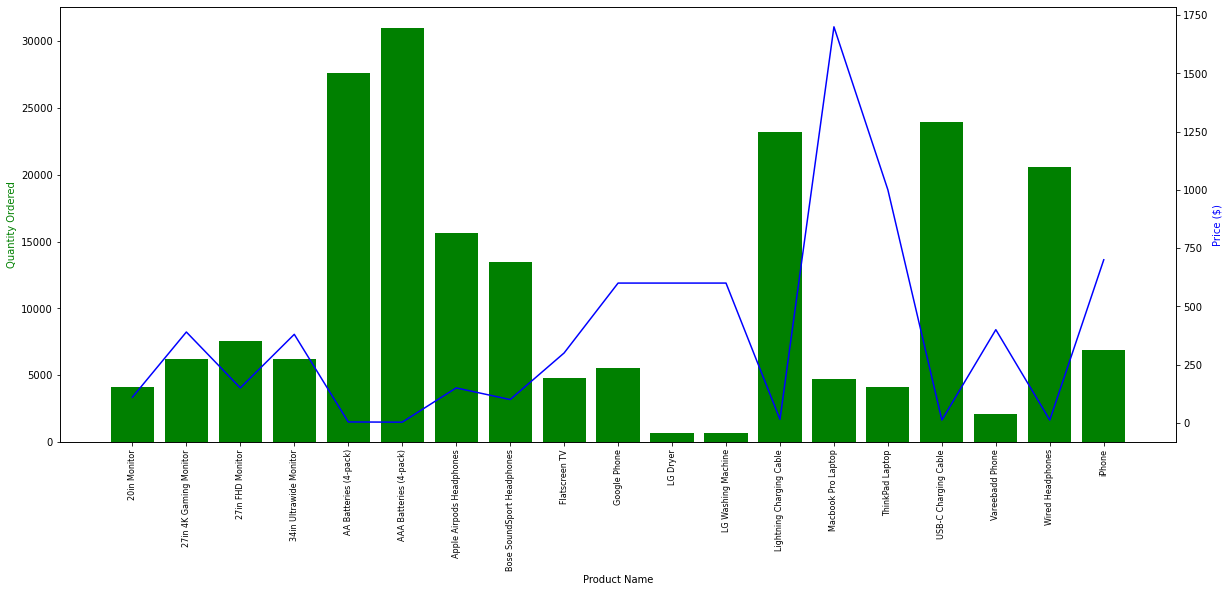

In [18]:
#Taking the mean price of each products
product_price = df.groupby('Product').mean()['Price Each']
product_price
# Making two y axes and one y axis just to compare prize of each produts sold and their quantity
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, product_price, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()